## Network Simulation

- Social network simulation: generation of social networks that arise from agents’ interactions.

- Agents interact with each other, resulting in the formation of ties and thus social networks (simulation output). The interaction is defined by a set of interaction rules.

- Simple Example:

<img src="simple_simulation.png" alt="simple_simulation" style="width:800px;"/>


- Tools 
    - Python
    - R: [NetSim: A Social Networks Simulation Tool in R](https://ethz.ch/content/dam/ethz/special-interest/gess/social-networks-dam/documents/jss_netsim.pdf)
    - [Netlogo](https://ccl.northwestern.edu/netlogo/)


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

# seed for replicable simulation results
np.random.seed(10)

## Watts-Strogatz Small World

Watts-Strogatz networks begin as k-rings: n nodes placed around a circle, with each node connected to its nearest k neighbors. Then, with probability p, each node's edges are moved to a randomly selected other node. These rewirings create shortcuts across the network. Even a small number of shortcuts greatly reduces the distances between nodes in the network, resolving the small-world problem.

In [2]:
# generate edges between adjacent nodes
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

- the modulo operator `%` is used to wrap around to the beginning of the node list when the end is reached. For instance, if j is equal to n, then j % n would return 0, effectively wrapping back to the beginning of the list.
- `yield` is like `return` except the function returns a generator object. See [this answer](https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do). 
- Using `return` in this function would cause the function to exit after the first iteration of the outer loop, and only generate edges for the first node in the list. By using `yield`, the function is able to generate edges for all nodes in the list and return them one by one, without exiting the function prematurely.

In [3]:
nodes = range(3)
for edge in adjacent_edges(nodes, 1):
    print(edge)

(0, 1)
(1, 2)
(2, 0)


In [4]:
def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

In [5]:
lattice = make_ring_lattice(16, 4)

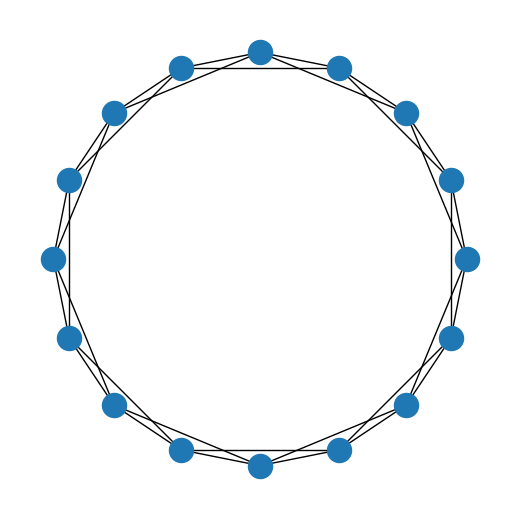

In [6]:
plt.figure(figsize=(5, 5))
nx.draw_circular(lattice)

In [7]:
def rewire(G, p):
    nodes = set(G)
    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)
            
def flip(p):
    """Returns True with probability `p`."""
    return np.random.random() < p 

In [8]:
def make_ws_graph(n, k, p):
    """Makes a Watts-Strogatz graph.
    
    n: number of nodes
    k: degree of each node
    p: probability of rewiring an edge
    """
    ws = make_ring_lattice(n, k)
    rewire(ws, p)
    return ws

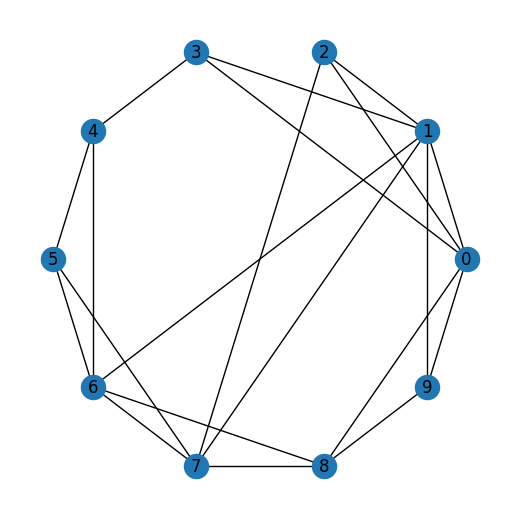

In [9]:
ws = make_ws_graph(10, 4, 0.2)

plt.figure(figsize=(5, 5))
nx.draw_circular(ws, with_labels=True)

(-1.2099999802410606,
 1.2099999981224538,
 -1.150778310639392,
 1.1507784234913778)

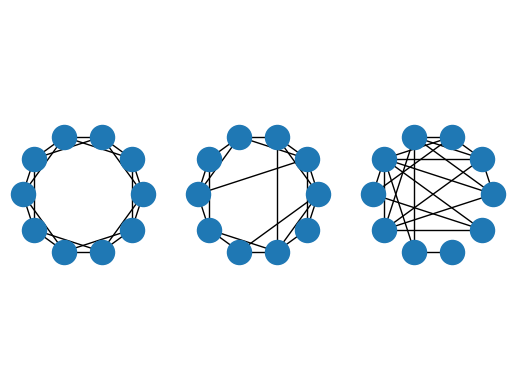

In [10]:
n = 10
k = 4

plt.subplot(1,3,1)
ws = make_ws_graph(n, k, 0)
nx.draw_circular(ws)
plt.axis('equal')

plt.subplot(1,3,2)
ws = make_ws_graph(n, k, 0.2)
nx.draw_circular(ws)
plt.axis('equal')

plt.subplot(1,3,3)
ws = make_ws_graph(n, k, 1.0)
nx.draw_circular(ws)
plt.axis('equal')

Slightly increasing p gives you a small-world network. 

In [11]:
G = nx.watts_strogatz_graph(20, 4, 0)

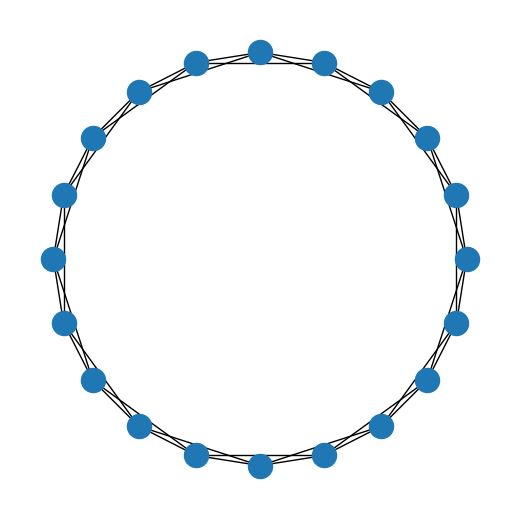

In [12]:
plt.figure(figsize=(5, 5))
nx.draw_circular(G)

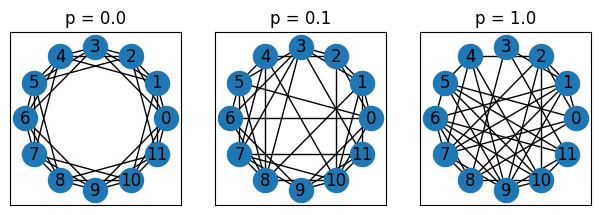

In [13]:
plt.figure(figsize=(7.5, 2.25))
for i, p in enumerate([0.0, 0.1, 1.0]):
   # Generate the graph
    G = nx.watts_strogatz_graph(12, 6, p)
    # Create layout and draw
    plt.subplot(1, 3, i + 1)
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos)
    plt.title("p = {:0.1f}".format(p))